In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import random
import pandas as pd
import time
from tqdm import tqdm
from itertools import combinations
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import datetime
import math
from scipy.stats import norm

In [2]:
rn = np.load('saved_rn_skewness_list.npz', allow_pickle = True)['arr_0'].tolist()
sf = np.load('saved_sf_skewness_list.npz', allow_pickle = True)['arr_0'].tolist()

In [68]:
len(rn)

100

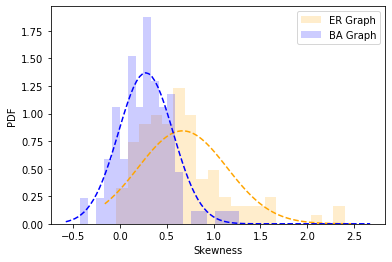

In [67]:
plt.hist(rn,alpha=0.2,density=True,bins=20,label='ER Graph',color='orange')
mean,std=norm.fit(rn)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='orange',linestyle='dashed')
plt.hist(sf,alpha=0.2,density=True,bins=20,label='BA Graph',color='blue')
mean,std=norm.fit(sf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,color='blue',linestyle='dashed')
plt.legend()
plt.xlabel('Skewness')
plt.ylabel('PDF')
plt.show()

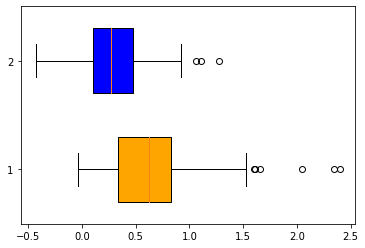

In [66]:
df = pd.DataFrame([rn, sf],
                  #columns=['ER','BA'],
                  index=['ER','BA'])
 
box = plt.boxplot(df, patch_artist=True,vert=False,widths = 0.6)
 
colors = ['orange','blue']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

#plt.xticks(['ER','BA'])
plt.show()

In [21]:
#RN

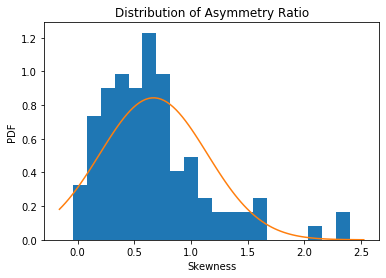

In [25]:
mean,std=norm.fit(rn)

plt.title('Distribution of Asymmetry Ratio')
plt.hist(rn,density=True,bins=20)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.xlabel('Skewness')
plt.ylabel('PDF')
plt.show()

In [26]:
print('Probability of asymmetric saturation time: ', 1-norm(mean, std).cdf(1))

Probability of asymmetric saturation time:  0.2426714713396857


In [27]:
from scipy.stats import ttest_ind

nfit1 = np.random.normal(loc=mean, scale=std, size=len(rn))

res = ttest_ind(nfit1, rn)

print(res)

Ttest_indResult(statistic=-0.029562162744235586, pvalue=0.9764460177464528)


In [12]:
#SF

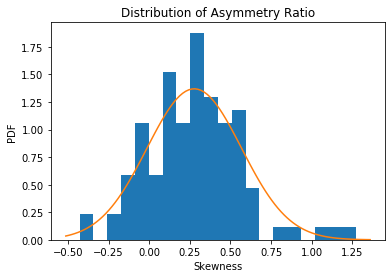

In [28]:
mean,std=norm.fit(sf)

plt.title('Distribution of Asymmetry Ratio')
plt.hist(sf,density=True,bins=20)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.xlabel('Skewness')
plt.ylabel('PDF')
plt.show()

In [29]:
print('Probability of asymmetric saturation time: ', 1-norm(mean, std).cdf(1))

Probability of asymmetric saturation time:  0.006535557758211352


In [30]:
from scipy.stats import ttest_ind

nfit1 = np.random.normal(loc=mean, scale=std, size=len(sf))

res = ttest_ind(nfit1, sf)

print(res)

Ttest_indResult(statistic=0.3163342738687103, pvalue=0.7520820358306026)
